In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [61]:
data = pd.read_csv('preprocessed_data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary (USD),Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,Asian


In [62]:
features = ['Gender','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(data[feature].unique())
    data[feature] = le.transform(data[feature])
    print(feature, data[feature].unique())

Gender [1 0 2]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


In [63]:
scaler = StandardScaler()
data[['Age', 'Years of Experience', 'Salary (USD)']] = scaler.fit_transform(data[['Age', 'Years of Experience', 'Salary (USD)']])
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary (USD),Race
0,-0.213129,1,0,11,-0.510769,-0.479849,9
1,-0.738393,0,2,1,-0.840811,-0.953461,5
2,1.493980,1,3,5,1.139440,0.656819,9
3,0.312135,0,0,10,-0.180727,-1.048183,5
4,2.413192,1,2,5,1.964544,1.604042,1


<Axes: >

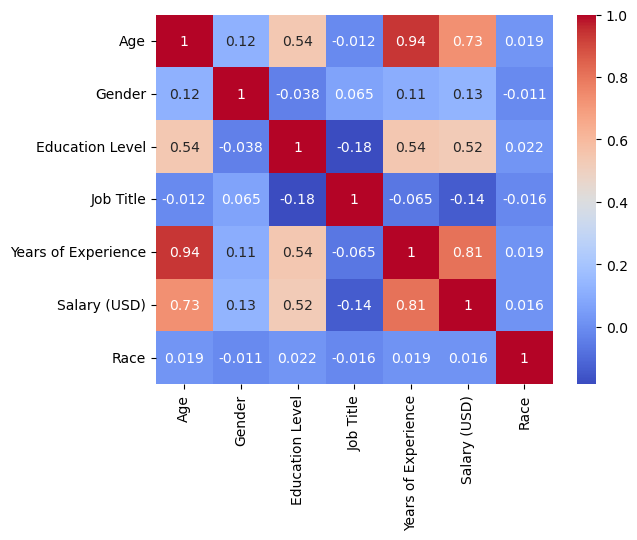

In [64]:
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [94]:
X = data.drop("Salary (USD)", axis=1)
y = data["Salary (USD)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=86487)

models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

#defining the parameters for the grid search
parameters_dt = {'max_depth' :[2,4,6,8,10],
'min_samples_split' :[2,4,6,8],
'min_samples_leaf' :[2,4,6,8],
'max_features' :[1.0, 'sqrt','log2'],
'random_state' :[0,42]}

parameters_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}
#creating the grid search object
grid_search = GridSearchCV(models['Decision Tree'],parameters_dt,cv=5,scoring='neg_mean_squared_error', verbose=1)
grid_search2 = GridSearchCV(models['Random Forest'],parameters_dt,cv=5,scoring='neg_mean_squared_error', verbose=1)

#fit the grid search object to the training data
grid_search.fit(X_train,y_train)
grid_search2.fit(X_train,y_train)

#print the best parameters
print("Best params for Decision Tree Regressor: ", grid_search.best_params_)
print("Best params for Random Forest Regressor: ", grid_search2.best_params_)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best params for Decision Tree Regressor:  {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}
Best params for Random Forest Regressor:  {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


Decision Tree
R2 Score:  0.9285019415831406
Mean Squared Error:  0.07190785554238154
Mean Absolute Error:  0.13941868373878008
RMSE: 0.26815640127056733
     Actual  Predicted
0 -1.237628  -1.237628
1  0.277930   0.404226
2 -1.142906  -1.077329
3 -0.100960  -1.248153
4  1.566154   1.556681
5 -1.616518  -1.572116
6 -0.851218  -1.055635
7 -0.385127  -0.669294
8 -1.237628  -1.048183
9 -0.037799   0.301882


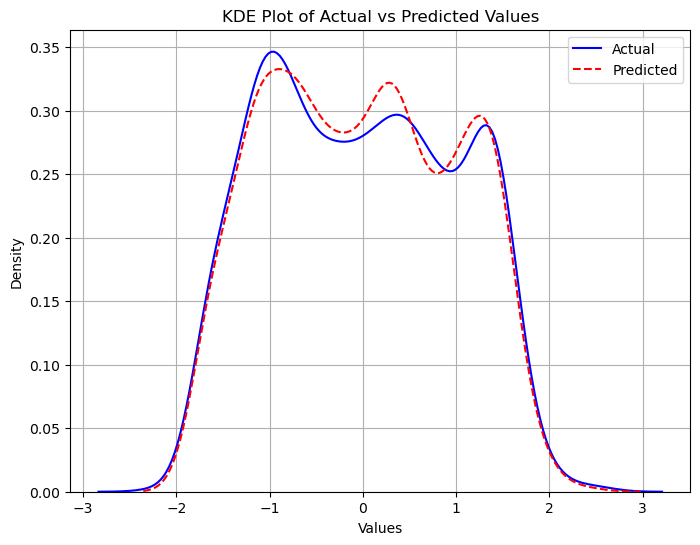





Random Forest
R2 Score:  0.9404389396051752
Mean Squared Error:  0.05990243961383158
Mean Absolute Error:  0.13319260524578366
RMSE: 0.2447497489556048
     Actual  Predicted
0 -1.237628  -1.253429
1  0.277930   0.261104
2 -1.142906  -1.080419
3 -0.100960  -1.254621
4  1.566154   1.553940
5 -1.616518  -1.586089
6 -0.851218  -1.015867
7 -0.385127  -0.374276
8 -1.237628  -1.004578
9 -0.037799   0.149965


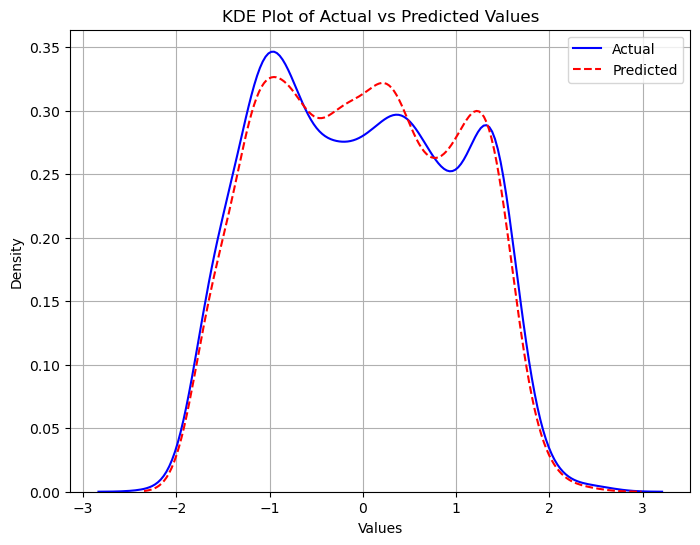

In [98]:
models = {
    'Decision Tree': DecisionTreeRegressor(max_depth = 10, max_features = 1.0 , min_samples_leaf = 2, min_samples_split = 6, random_state = 345678),
    'Random Forest': RandomForestRegressor(max_depth = 10, max_features = 1.0, min_samples_leaf = 2, min_samples_split = 2, random_state = 345678),
}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("R2 Score: ", r2_score(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

    dft = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    dft.reset_index(drop=True, inplace=True)
    print(dft.head(10))

    plt.figure(figsize=(8, 6))
    sns.kdeplot(dft['Actual'], color='blue', label='Actual', linestyle='-')
    sns.kdeplot(dft['Predicted'], color='red', label='Predicted', linestyle='--')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('KDE Plot of Actual vs Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n")
    print("\n")

